1 RLE Sederhana untuk data

1.1 Encoding

In [1]:
def encode_message(message):
    encode_string = ""
    i = 0
    while (i <= len(message) - 1):
        count = 1
        ch = message[i]
        j = i
        while (j < len(message) - 1):
            if (message[i] == message[j+1]):
                count = count + 1
                j = j + 1
            else:
                break
        encode_string = encode_string + str(count) + ch
        i = j + 1
        
    return encode_string

1.2 Decoding

In [3]:
def decode_message(our_message):
    decoded_message = ""
    i = 0
    j = 0
    while (i <= len(our_message) - 1):
        run_count = int(our_message[i])
        run_word = our_message[i + 1]
        for j in range(run_count):
            decoded_message = decoded_message + run_word
            j = j + 1
        i = i + 2
    
    return decoded_message

1.3 Display

In [5]:
def display():
    our_message = "Hakim Asrori"
    encoded_message = encode_message(our_message)
    decoded_message = decode_message(encoded_message)
    print("Original string: [" + our_message + "] \n Encoded string: [" + encoded_message + "] \n Decoded string: [" + our_message + "] \n")

display()

Original string: [Hakim Asrori] 
 Encoded string: [1H1a1k1i1m1 1A1s1r1o1r1i] 
 Decoded string: [Hakim Asrori] 



2 RLE Gambar Sederhana (Grayscale image)

2.1 Import Library

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

2.2 Fungsi Basic

In [10]:
def show(img, figsize=(10, 10), title="Image"):
    figure = plt.figure(figsize=figsize)

    plt.imshow(img)
    plt.show()

def get_size(filename="dd.png"):
    stat = os.stat(filename)
    size = stat.st_size

    return size

2.3 Encoding

In [8]:
def RLE_encoding(img, bits=8, binary=True, view=True):
    """
    img: Grayscale img.
    bits: run length maksimum adalah 2 bits
    """
    if binary:
        ret, img = cv2.threshold(img, 277, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    if view:
        show(img)
    
    encoded = []

    shape = img.shape
    count = 0 
    prev = None
    fimg = img.flatten()
    th = 127
    for pixel in fimg:
        if binary:
            if pixel < th:
                pixel = 0
            else:
                pixel = 1
        
        if prev==None:
            prev = pixel
            count += 1
        else:
            if prev!=pixel:
                encoded.append((count, prev))
                prev = pixel
                count = 1
            else:
                if count < (2**bits) - 1:
                    count += 1
                else:
                    encoded.append((count, prev))
                    prev = pixel
                    count = 1
    
    encoded.append((count, prev))

    return [np.array(encoded), img]

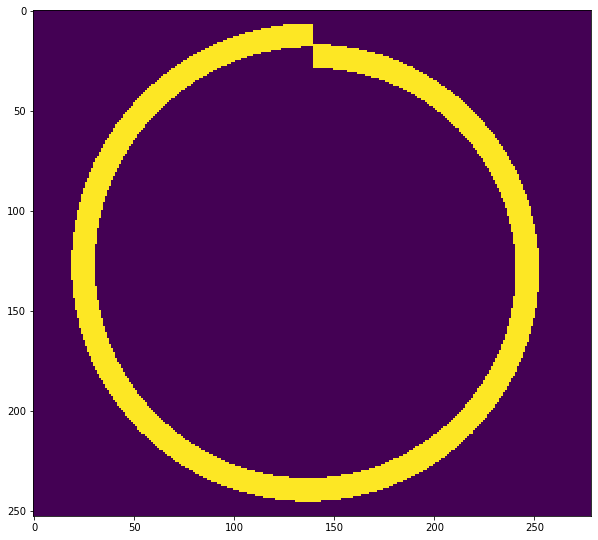

[[255   0]
 [255   0]
 [255   0]
 ...
 [255   0]
 [255   0]
 [ 48   0]]


In [11]:
# Uji Coba
fpath = "data/bg20.png"
img = cv2.imread(fpath, 0)
shape = img.shape

[encoded, ori] = RLE_encoding(img, bits=8)

print(encoded)

2.4 Decoding

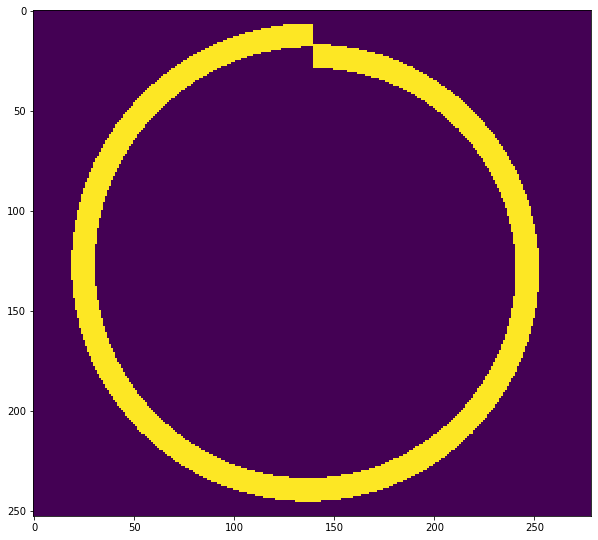

In [12]:
def RLE_decode(encoded, shape):
    decoded = []

    for rl in encoded:
        r, p =  rl[0], rl[1]
        decoded.extend([p] * r)
    
    dimg = np.array(decoded).reshape(shape)

    return dimg

dimg = RLE_decode(encoded, shape)

show(dimg)

2.5 Hitung size kompresi

In [13]:
cv2.imwrite('data/encoded.tif', encoded)
cv2.imwrite('data/encoded.png', encoded)
cv2.imwrite('data/encoded.bmp', encoded)

True

In [14]:
files = ["data/encoded.png", 'data/encoded.tif', 'data/encoded.bmp', fpath]

for f in files:
    print(f"File: {f} => Size: {get_size(f)} Bytes")

File: data/encoded.png => Size: 2088 Bytes
File: data/encoded.tif => Size: 1532 Bytes
File: data/encoded.bmp => Size: 4794 Bytes
File: data/bg20.png => Size: 17272 Bytes


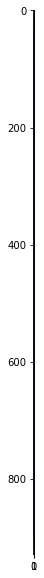

In [15]:
show(encoded)

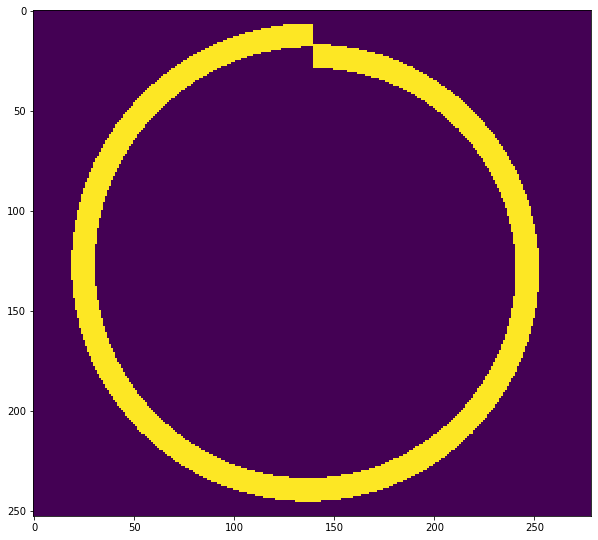

In [16]:
show(dimg)

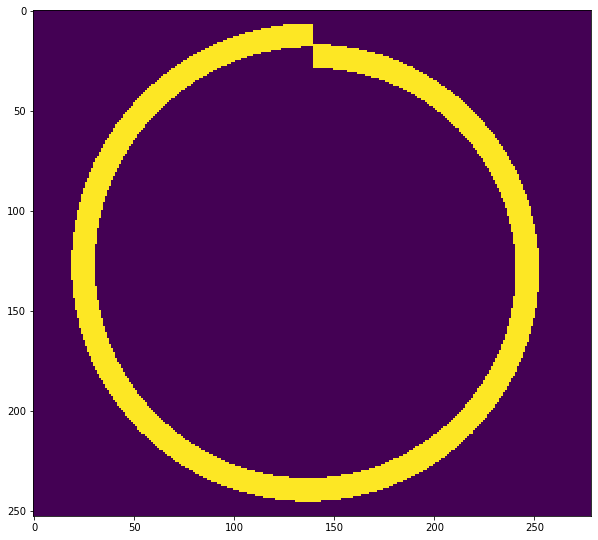

In [17]:
show(ori)

3 RLE Gambar RGB

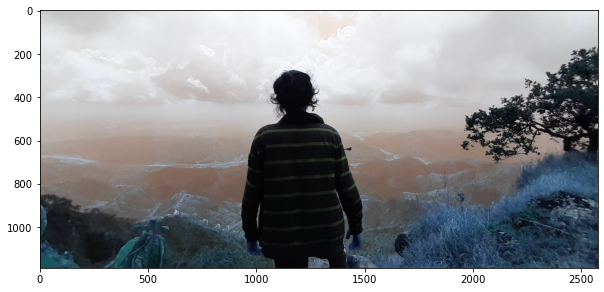

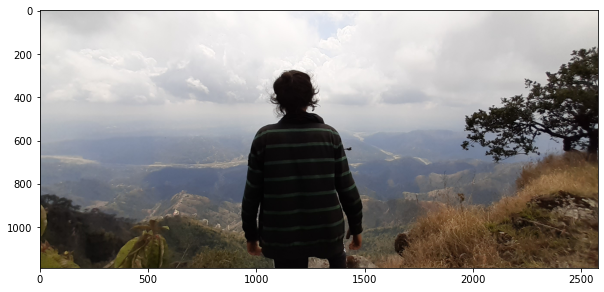

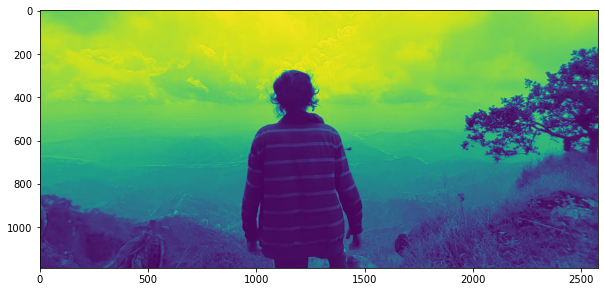

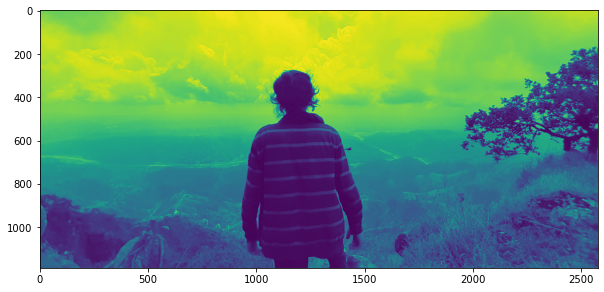

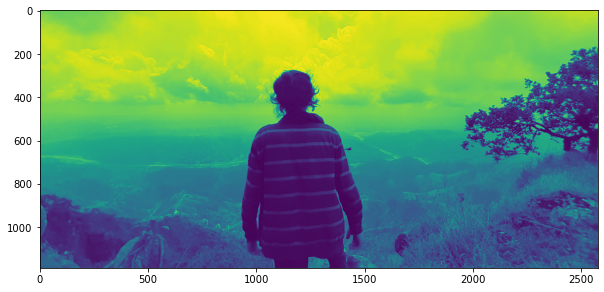

c:\Users\ACER\anaconda3\envs\pcd\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


Original size: 640.6875 Byte, TIFF: 7377.001953125 Byte, NPZ: 50017.7421875 Byte


In [22]:
bgr = cv2.imread('data/scene.jpg', 1)
show(bgr)

show(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))

b, g, r = bgr[:,:,0], bgr[:,:,1], bgr[:,:,2]

[be, imgbe] = RLE_encoding(b, binary=False)
[ge, imgge] = RLE_encoding(g, binary=False)
[re, imgre] = RLE_encoding(g, binary=False)

be.shape, ge.shape, re.shape

np.savez('data/rgbe.npz', [be, ge, re], dtype=object)
get_size('data/rgbe.npz')

np.savez('data/be.npz', be)
np.savez('data/ge.npz', ge)
np.savez('data/re.npz', re)

cv2.imwrite('data/be.tif', be)
cv2.imwrite('data/ge.tif', ge)
cv2.imwrite('data/re.tif', re)

files = "bgr"

snp = 0
stif = 0

for f in files:
    ft = 'data/'+f+'e.npz'
    snp += get_size(ft)
    
    ft = 'data/'+f+'e.tif'
    stif += get_size(ft)

print(f'Original size: {get_size("data/scene.jpg")/1024} Byte, TIFF: {stif/1024} Byte, NPZ: {snp/1024} Byte')